# **USED BIKE PRICE PREDICTION USING LINEAR REGRESSION**

**This notebook implements the Multiple Linear Regression to predict the price of used bikes using diffrent features like type of onwership, Kilometer driven,Brand, Power etc.**

## **Importing dependancies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## **Importing Data**

In [2]:
df = pd.read_csv('../input/used-bikes-prices-in-india/Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


# **EDA ANALYSIS ON DATA**

## **Getting the names of all features**

In [3]:
for col in df.columns:
    print(col)

bike_name
price
city
kms_driven
owner
age
power
brand


## **Checking for Null Values in Data**

In [4]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

## **Converting Price for visualization**

In [5]:
price=(df['price']/1000)
price.rename("s_price", inplace=True)
sprice_df = pd.concat([df,price],axis=1)
s_price_df=sprice_df.drop(['price'],axis=1)
s_price_df.head()

,bike_name,city,kms_driven,owner,age,power,brand,s_price
0,TVS Star City Plus Dual Tone 110cc,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,35.0
1,Royal Enfield Classic 350cc,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,119.9
2,Triumph Daytona 675R,Delhi,110.0,First Owner,8.0,675.0,Triumph,600.0
3,TVS Apache RTR 180cc,Bangalore,16329.0,First Owner,4.0,180.0,TVS,65.0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,80.0


[Text(0.5, 0, 'Price(in 1000)'), Text(0, 0.5, 'Type of Owner')]

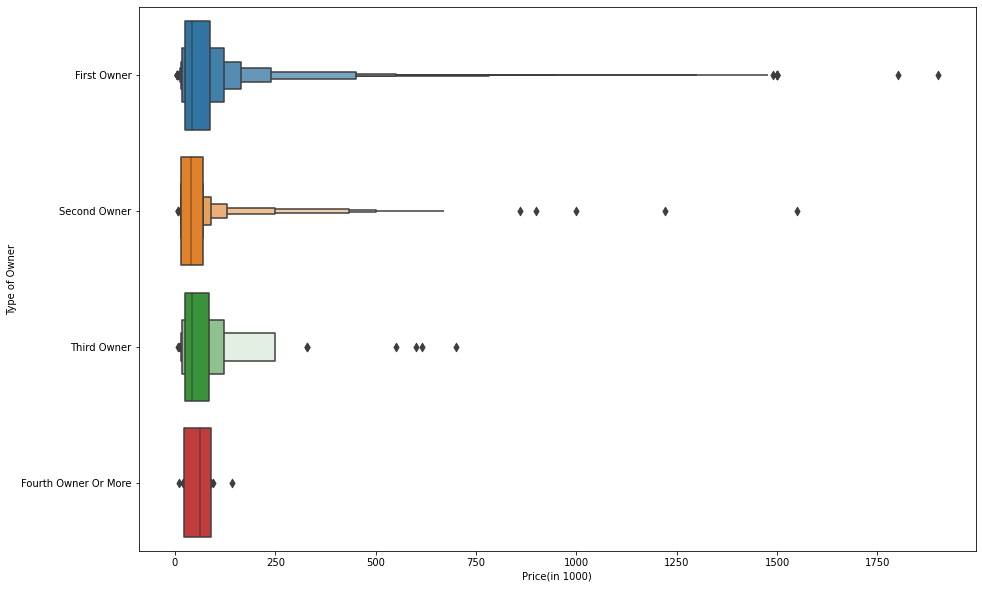

In [6]:
plt.figure(figsize = (15,10))
sns.boxenplot(x="s_price",y="owner",data=s_price_df).set(xlabel='Price(in 1000)',ylabel='Type of Owner')

[Text(0.5, 0, 'Price(in 1000)'), Text(0, 0.5, 'KM dirven')]

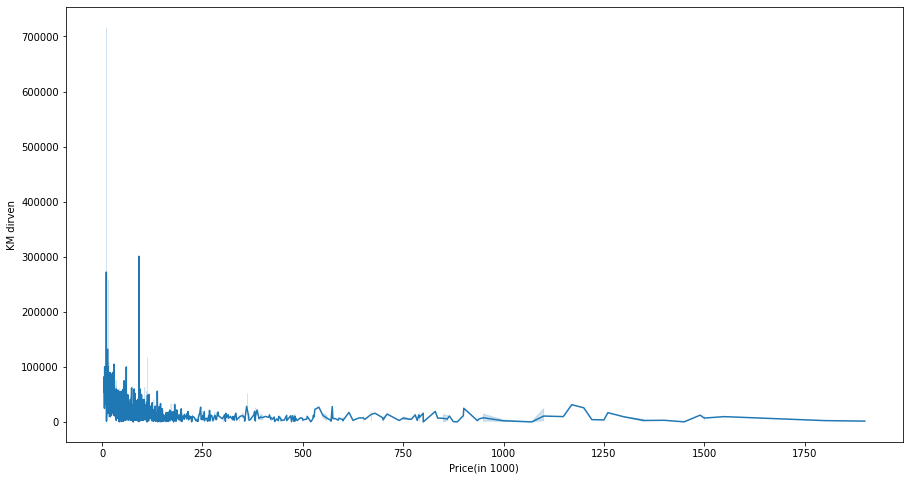

In [7]:
plt.figure(figsize = (15,8))
sns.lineplot(x="s_price",y="kms_driven",data=s_price_df).set(xlabel='Price(in 1000)',ylabel='KM dirven')

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Price(in 1000)')]

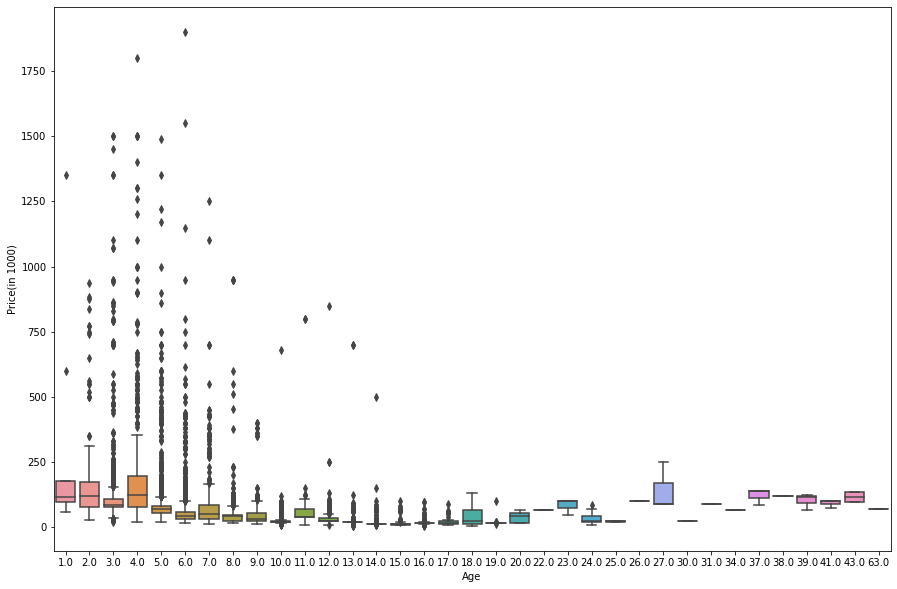

In [8]:
plt.figure(figsize = (15,10))
sns.boxplot(x='age',y='s_price',data=s_price_df).set(xlabel='Age',ylabel='Price(in 1000)')

[Text(0.5, 0, 'Power'), Text(0, 0.5, 'Price(in 1000)')]

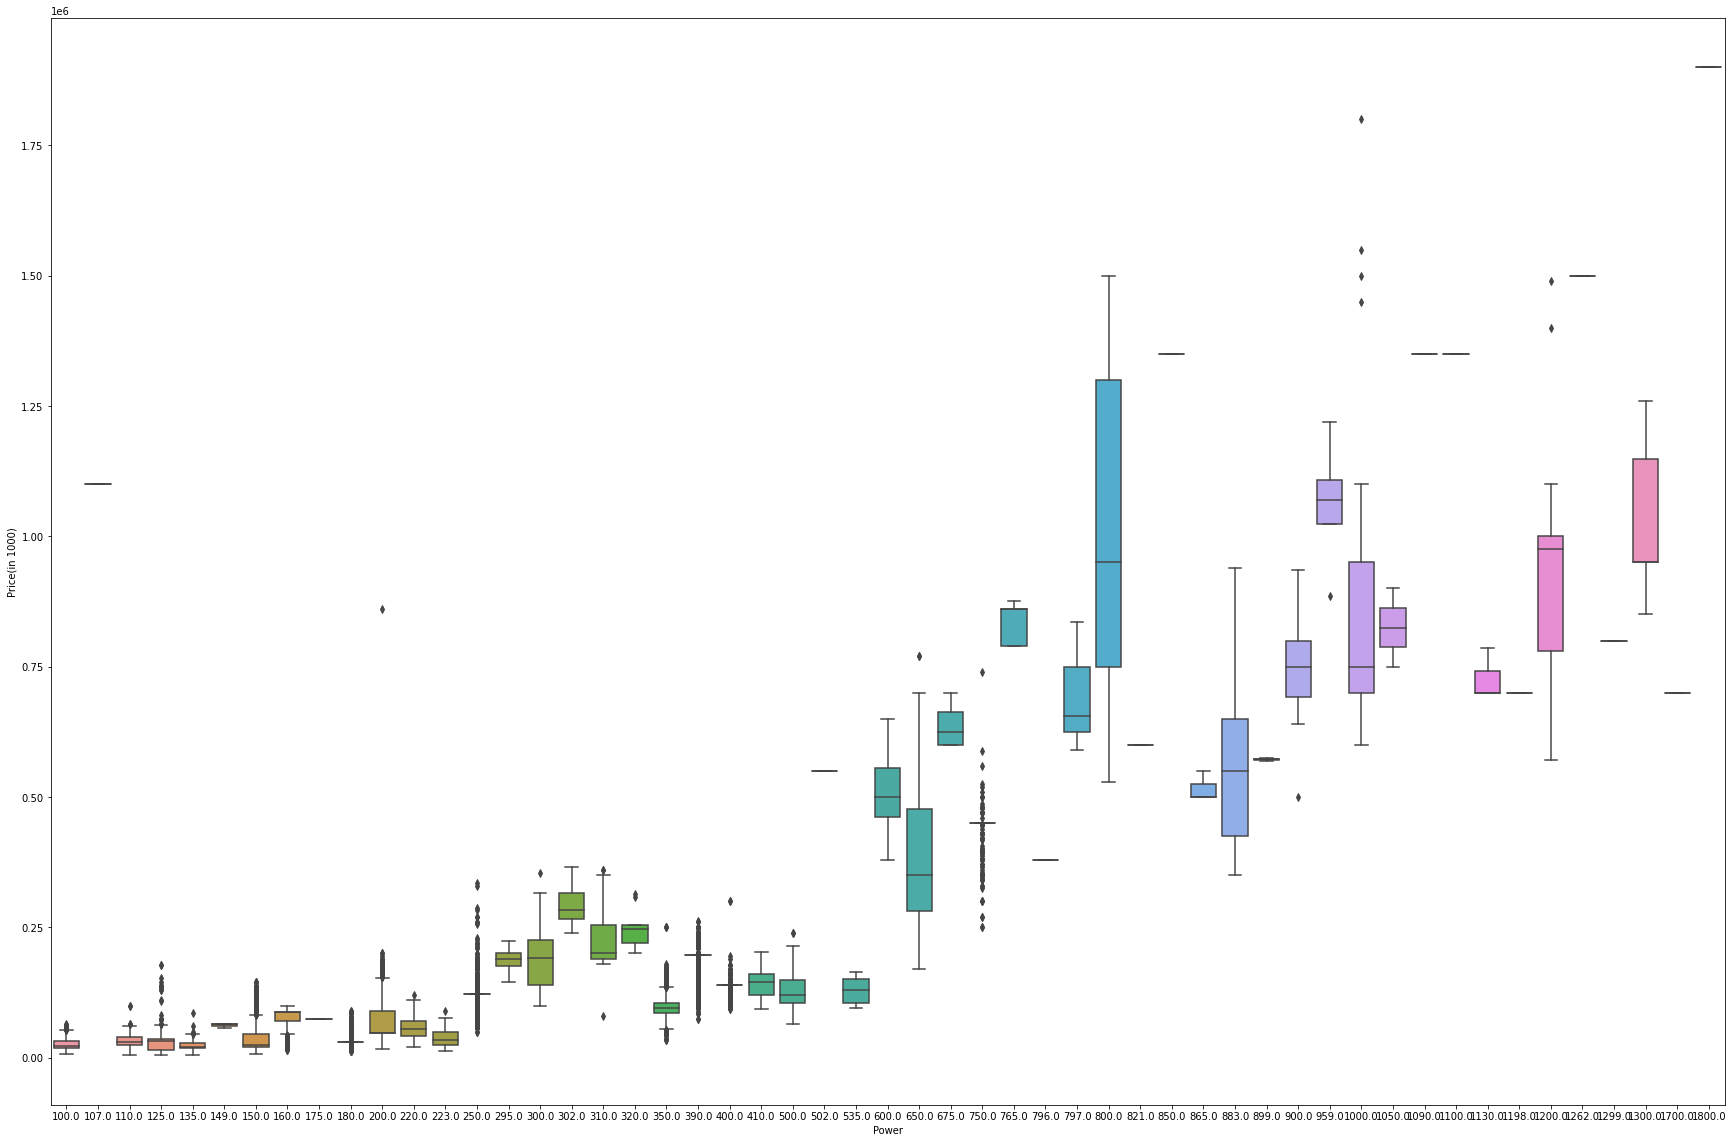

In [9]:
plt.figure(figsize = (30,20))
sns.boxplot(x='power',y='price',data=df).set(xlabel='Power',ylabel='Price(in 1000)')

# **DATA PREPARATION FOR MODELLING**

## **Creating Dummies to Process Srting Data**

**Dummies for Type of Ownership**

In [10]:
owner_dummies=pd.get_dummies(df.owner)
owner_dummies.head()

,First Owner,Fourth Owner Or More,Second Owner,Third Owner
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


**Dummies for different Brands**

In [11]:
brand_dummies=pd.get_dummies(df.brand)
brand_dummies.head()

,BMW,Bajaj,Benelli,Ducati,Harley-Davidson,Hero,Honda,Hyosung,Ideal,Indian,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Merging Dummies with Data**

In [12]:
merged_df = pd.concat([df,owner_dummies,brand_dummies],axis=1)
merged_df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand,First Owner,Fourth Owner Or More,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS,1,0,...,0,0,0,0,0,0,1,0,0,0
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield,1,0,...,0,0,0,0,1,0,0,0,0,0
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph,1,0,...,0,0,0,0,0,0,0,1,0,0
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS,1,0,...,0,0,0,0,0,0,1,0,0,0
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha,1,0,...,0,0,0,0,0,0,0,0,1,0


**Dropping Unwanted Columns**

In [13]:
final_df=merged_df.drop(['brand','BMW','owner','Fourth Owner Or More','bike_name','city'],axis=1)
final_df.head()

,price,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,35000.0,17654.0,3.0,110.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,119900.0,11000.0,4.0,350.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600000.0,110.0,8.0,675.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,65000.0,16329.0,4.0,180.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,80000.0,10000.0,3.0,150.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# **MAKING MODEL USING LINEAR REGRESSION**

## **Defining Dependent and Independent Variables**

**Dependent variable will be everything apart from price**

In [14]:
x= final_df.drop(['price'],axis=1)
x.head()

,kms_driven,age,power,First Owner,Second Owner,Third Owner,Bajaj,Benelli,Ducati,Harley-Davidson,...,LML,MV,Mahindra,Rajdoot,Royal Enfield,Suzuki,TVS,Triumph,Yamaha,Yezdi
0,17654.0,3.0,110.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,11000.0,4.0,350.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,110.0,8.0,675.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16329.0,4.0,180.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10000.0,3.0,150.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Independent variable will be price**

In [15]:
y= final_df[['price']]
y.head()

,price
0,35000.0
1,119900.0
2,600000.0
3,65000.0
4,80000.0


## **Splitting Test and Train data sets**

**Train and Test data is split by 80-20 ratio, also Train data is fixed**

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

## **Model Training**

In [17]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## **Checking Model Accuracy**

In [18]:
accuracy=(model.score(x_test,y_test))*100
print('Model Accuracy:', accuracy)

Model Accuracy: 89.93327337387211
